Student name        : Leo Toueg
Student #           : 20062982
Student ID/email    : 16lsit(@queensu.ca)

                                                                                    CISC/CMPE Advanced Data Analytics W22: Exercise 3

In [259]:
import pandas as pd
from bs4 import BeautifulSoup
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import ngrams
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Preprocessing (30 Points)


In [260]:
df = pd.read_csv("Questions.csv")
df = df[0:10000]
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


We are not interested in Id, OwnerUserId, CreationDate and Score, for obvious reasons.
As we are only focusing on topic analysis , we only need to look at title and body.

In [261]:
df = df.drop(columns=['CreationDate','Id', 'OwnerUserId','Score'])

For my preprocessing, I am going to use the Title column, because in theory it should be an abstracted version of the body, and I am hoping
it captures the topic better than the body. Since it also uses fewer words, it is more likely to contain words that are similar to the topics
captures by the different posts on Stack Overflow.

Methods used: Apply Lower-Case, Remove Stop-Words, Tokenize, Remove Punctuation, Stemming

In [262]:
#Preprocessing
from nltk.corpus import stopwords
from nltk import word_tokenize, PorterStemmer

def preProcessing(string):

    #Make lower case
    string=string.lower()

    #split into words
    tokens=word_tokenize(string)

    #Filter out punctuation
    words = [word for word in tokens if word.isalpha()]

    #Filter out stop words
    stop_words = stopwords.words('english')
    words=[w for w in words if w not in stop_words]

    #Reducing to stem
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]

    return(stemmed)

df=df["Title"].apply(preProcessing)
print(df)

0                            [access, last, valu, vector]
1         [wors, sin, side, effect, pass, massiv, object]
2                         [explain, quantil, function, r]
3                                    [test, eof, flag, r]
4       [r, packag, learn, dirichlet, prior, count, data]
                              ...                        
9995                                 [rcurl, send, cooki]
9996                           [read, monthli, return, r]
9997    [multipli, column, valu, one, column, anoth, c...
9998            [adjust, posit, font, size, legend, titl]
9999                                             [replac]
Name: Title, Length: 10000, dtype: object


### Learning word vectors from text corpus (30 Points)

I used GENSIM Python library to learn word embeddings as it was originally made for topic analysis.

In [263]:
text_array = df.to_numpy()
from gensim import corpora
dictionary = corpora.Dictionary(text_array)
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in text_array]
#print(corpus)

#Save Dictionary and Corpus
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### Topic Modeling (30 Points)

In [264]:
#Model Evaluation (perplexity)
modelScores={"Topics":[],"Perplexity":[]}

3 Topics in the Data

In [265]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model1.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p3 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p3)

(0, '0.066*"r" + 0.041*"plot" + 0.034*"column" + 0.029*"valu"')
(1, '0.115*"r" + 0.030*"use" + 0.027*"packag" + 0.025*"file"')
(2, '0.095*"r" + 0.033*"data" + 0.032*"function" + 0.025*"list"')


5 Topics in the Data

In [266]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model2.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p5 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p5)

(0, '0.100*"r" + 0.042*"packag" + 0.026*"use" + 0.021*"output"')
(1, '0.128*"r" + 0.035*"file" + 0.021*"data" + 0.020*"time"')
(2, '0.082*"plot" + 0.072*"r" + 0.024*"use" + 0.019*"multipl"')
(3, '0.086*"r" + 0.084*"function" + 0.049*"use" + 0.032*"loop"')
(4, '0.070*"r" + 0.057*"data" + 0.049*"column" + 0.041*"valu"')


10 Topics in the Data

In [267]:
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p10 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p10)

(0, '0.081*"data" + 0.071*"column" + 0.069*"r" + 0.062*"valu"')
(1, '0.119*"r" + 0.081*"file" + 0.035*"string" + 0.028*"charact"')
(2, '0.077*"r" + 0.046*"tabl" + 0.044*"set" + 0.043*"matrix"')
(3, '0.114*"r" + 0.027*"calcul" + 0.020*"problem" + 0.020*"model"')
(4, '0.113*"r" + 0.069*"time" + 0.037*"seri" + 0.024*"script"')
(5, '0.115*"r" + 0.063*"list" + 0.041*"packag" + 0.036*"use"')
(6, '0.134*"plot" + 0.081*"r" + 0.026*"label" + 0.025*"use"')
(7, '0.109*"function" + 0.081*"r" + 0.041*"use" + 0.033*"loop"')
(8, '0.030*"map" + 0.026*"r" + 0.023*"correl" + 0.022*"display"')
(9, '0.103*"r" + 0.052*"object" + 0.034*"date" + 0.024*"use"')


25 Topics in the Data

In [268]:
NUM_TOPICS = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model4.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p25 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p25)

(7, '0.344*"data" + 0.133*"frame" + 0.100*"r" + 0.094*"creat"')
(22, '0.241*"function" + 0.104*"r" + 0.058*"set" + 0.053*"within"')
(11, '0.126*"r" + 0.072*"run" + 0.069*"script" + 0.064*"model"')
(16, '0.211*"error" + 0.061*"r" + 0.058*"mean" + 0.056*"larg"')
(5, '0.197*"column" + 0.113*"row" + 0.072*"r" + 0.067*"name"')
(10, '0.137*"multipl" + 0.087*"r" + 0.078*"subset" + 0.069*"appli"')
(17, '0.105*"way" + 0.087*"r" + 0.060*"without" + 0.053*"command"')
(20, '0.151*"differ" + 0.094*"chang" + 0.086*"group" + 0.072*"color"')
(0, '0.227*"valu" + 0.068*"r" + 0.048*"na" + 0.044*"anoth"')
(3, '0.136*"ggplot" + 0.104*"point" + 0.062*"add" + 0.059*"size"')
(6, '0.177*"file" + 0.147*"r" + 0.079*"tabl" + 0.059*"read"')
(12, '0.082*"label" + 0.082*"r" + 0.082*"axi" + 0.046*"test"')
(18, '0.182*"loop" + 0.125*"r" + 0.063*"result" + 0.037*"use"')
(21, '0.178*"r" + 0.083*"work" + 0.047*"equival" + 0.037*"latex"')
(15, '0.112*"use" + 0.066*"r" + 0.059*"one" + 0.048*"insid"')
(13, '0.228*"packag" +

30 Topics in the Data

In [269]:
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p30 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p30)

(12, '0.153*"way" + 0.079*"r" + 0.056*"express" + 0.039*"c"')
(22, '0.200*"time" + 0.134*"r" + 0.108*"seri" + 0.106*"code"')
(23, '0.112*"r" + 0.083*"mean" + 0.080*"larg" + 0.047*"sampl"')
(8, '0.152*"differ" + 0.143*"two" + 0.101*"r" + 0.061*"merg"')
(9, '0.176*"tabl" + 0.075*"r" + 0.048*"frequenc" + 0.043*"xml"')
(16, '0.133*"r" + 0.073*"work" + 0.053*"method" + 0.052*"aggreg"')
(24, '0.150*"ggplot" + 0.110*"subset" + 0.106*"extract" + 0.101*"add"')
(5, '0.246*"packag" + 0.190*"r" + 0.070*"instal" + 0.059*"use"')
(1, '0.367*"data" + 0.141*"frame" + 0.071*"r" + 0.052*"appli"')
(4, '0.142*"loop" + 0.137*"r" + 0.132*"datafram" + 0.066*"remov"')
(21, '0.129*"set" + 0.075*"order" + 0.055*"r" + 0.053*"access"')
(0, '0.255*"variabl" + 0.194*"get" + 0.062*"r" + 0.027*"fail"')
(28, '0.165*"error" + 0.112*"factor" + 0.081*"r" + 0.052*"size"')
(2, '0.200*"object" + 0.106*"r" + 0.063*"class" + 0.059*"ad"')
(13, '0.201*"file" + 0.151*"r" + 0.080*"multipl" + 0.071*"text"')
(25, '0.201*"column" + 0

35 Topics in the Data

In [270]:
NUM_TOPICS = 35
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model6.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
p35 = ldamodel.log_perplexity(corpus)
modelScores["Topics"].append(NUM_TOPICS)
modelScores["Perplexity"].append(p35)

(1, '0.131*"text" + 0.109*"without" + 0.098*"charact" + 0.072*"map"')
(30, '0.273*"file" + 0.148*"r" + 0.092*"read" + 0.056*"csv"')
(33, '0.139*"r" + 0.067*"histogram" + 0.066*"plot" + 0.066*"numer"')
(29, '0.151*"set" + 0.098*"r" + 0.076*"class" + 0.074*"match"')
(13, '0.360*"data" + 0.150*"frame" + 0.081*"r" + 0.051*"convert"')
(11, '0.195*"get" + 0.144*"r" + 0.088*"remov" + 0.064*"work"')
(22, '0.190*"list" + 0.138*"loop" + 0.102*"r" + 0.074*"function"')
(21, '0.240*"matrix" + 0.170*"differ" + 0.105*"r" + 0.054*"length"')
(31, '0.160*"r" + 0.137*"call" + 0.053*"java" + 0.051*"uniqu"')
(0, '0.165*"way" + 0.104*"r" + 0.074*"array" + 0.045*"memori"')
(12, '0.165*"string" + 0.079*"larg" + 0.069*"r" + 0.060*"express"')
(10, '0.192*"within" + 0.063*"r" + 0.061*"fix" + 0.060*"exist"')
(8, '0.187*"base" + 0.090*"dataset" + 0.047*"input" + 0.040*"zero"')
(17, '0.317*"plot" + 0.075*"r" + 0.067*"point" + 0.062*"label"')
(26, '0.112*"na" + 0.078*"random" + 0.064*"python" + 0.060*"paramet"')
(32

<AxesSubplot:xlabel='Topics'>

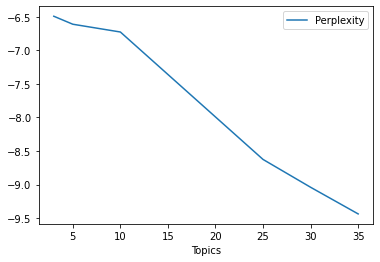

In [271]:
#Graph Perplexity for each model
perplex = pd.DataFrame.from_dict(modelScores)
perplex.plot.line(x="Topics", y="Perplexity")

This “Scatter Plot” is used to generate a scatter chart of the number of topics k against the metric of perplexity. As k gets larger, the perplexity decreases. This makes sense because the more clusters there are, the smaller the distances between the data points and their cluster centers. The idea of the Elbow method is to choose the number of clusters at which the curve decreases abruptly. This produces a so-called "elbow" in the graph. In the plot above you can see that the first drop is after k=10. Therefore, a choice of 11 topics would appear to be the optimal number.

Note that the Elbow method is heuristic and might not always work for all data sets.

Other example on model visualisation:

In [272]:
#Example on how to visualise a model's fit: n = 3 and n= 25
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
import pyLDAvis.gensim_models as gensimvis

lda = gensim.models.ldamodel.LdaModel.load('model1.gensim')
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

lda = gensim.models.ldamodel.LdaModel.load('model4.gensim')
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

c:\users\admin\desktop\winter 2022\cisc 351\assignments\351a2\venv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
c:\users\admin\desktop\winter 2022\cisc 351\assignments\351a2\venv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Summary (30 Points)

In summary, Our topic Modeling process revealed, using both the elbow method and topic visualisation using pyLDAvis that the appropriate number of topics
should be around 20. In part 2, we applied text data preprocessing to allow proper word embeddings. As a result, we tried a different number of topics(for computer
and program performance I was only able to run a couple different sizes to get a general shape of the curve (for the elbow method). If I had better resources, I
would probably iterate and try k topics for 1<k<50. Similarily, because of computer performance, I took the df to be the first 1000000 lines only.